In [1]:
# Get current login user name & change directory to home.
import os
tmp = os.getlogin()
homedir = 'c:/Users/'+os.getlogin()+'/Documents/GitHub/Proteome-tool/'
os.chdir(homedir)

In [2]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import poisson

df1 = pd.read_csv(filepath_or_buffer='./raw/(1)Protein_Groups_PCa_lncap.csv', encoding='utf-8')
#df2 = pd.read_csv(filepath_or_buffer='./raw/(1)Protein_Groups_PCa_lncap2.csv', encoding='utf-8')

#g1 = df1['LNCaP/RWPE-1 normalized 1st'].tolist()
#g2 = df2['LNCaP/RWPE-1 normalized median-scaling 1st'].tolist()

# Divide every element in list to specific number
#g1[:] = [math.log2(x) for x in g1]

In [3]:
# Drop some columns
filt = ['Protein IDs', 'Protein names', 'Gene Names', 'Best MS/MS']
new_df = df1.drop(columns=filt, inplace=False)
new_df.info()

# rename column names
cnames = {'LNCaP/RWPE-1 normalized 1st':'1st',
          'LNCaP/RWPE-1 normalized 2nd':'2nd',
          'LNCaP/RWPE-1 normalized 3rd':'3rd'}
new_df.rename(columns = cnames, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1744 entries, 0 to 1743
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   LNCaP/RWPE-1 normalized 1st  1744 non-null   float64
 1   LNCaP/RWPE-1 normalized 2nd  1744 non-null   float64
 2   LNCaP/RWPE-1 normalized 3rd  1744 non-null   float64
dtypes: float64(3)
memory usage: 41.0 KB


In [5]:
df_sorted = pd.DataFrame(np.sort(new_df.values, axis=0), index = new_df.index, columns = new_df.columns)
df_mean = df_sorted.mean(axis=1)
df_mean.head()

0    0.081446
1    0.099361
2    0.114974
3    0.120053
4    0.125290
dtype: float64

In [6]:
df_mean.index = np.arange(1, len(df_mean) + 1)
df_mean.head()

1    0.081446
2    0.099361
3    0.114974
4    0.120053
5    0.125290
dtype: float64

In [8]:
# 동시에, 원본데이터프레임으로 부터 그룹별로 rank를 매김.
new_df.rank(method='min').astype(int)

,1st,2nd,3rd
0,679,376,721
1,1690,1702,1678
2,418,472,261
3,1200,1251,1304
4,1276,1225,1258
...,...,...,...
1739,1085,1069,828
1740,1640,1635,1654
1741,43,38,46
1742,1576,1397,1518


In [9]:
# 원본 랭크를 토대로 ...
new_df.rank(method='min').stack().astype(int)

0     1st     679
      2nd     376
      3rd     721
1     1st    1690
      2nd    1702
             ... 
1742  2nd    1397
      3rd    1518
1743  1st    1649
      2nd    1599
      3rd    1596
Length: 5232, dtype: int32

In [37]:
# Critical Step
df_qn = new_df.rank(method='min').stack().astype(int).map(df_mean).unstack()
df_qn.head()

,1st,2nd,3rd
0,0.918460,0.752610,0.936673
1,3.201467,3.470633,3.021133
2,0.785823,0.816030,0.643527
3,1.245833,1.293333,1.367600
4,1.323233,1.270133,1.300633


In [ ]:
def quantile_normalize(df):
    """
    input: dataframe with numerical columns
    output: dataframe with quantile normalized values
    """
    df_mean = df.mean(axis=1)
    df_mean.index = np.arange(1, len(df_mean) + 1)
    df_qn = df.rank(method='min').stack().astype(int).map(df_mean).unstack()
    return df_qn

<Axes: ylabel='Density'>

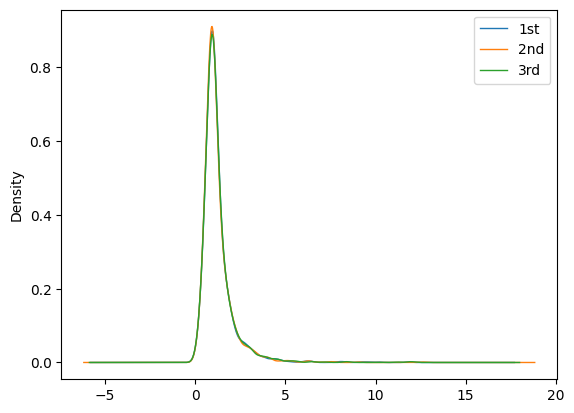

In [12]:
new_df.plot.density(linewidth=1)

<Axes: ylabel='Density'>

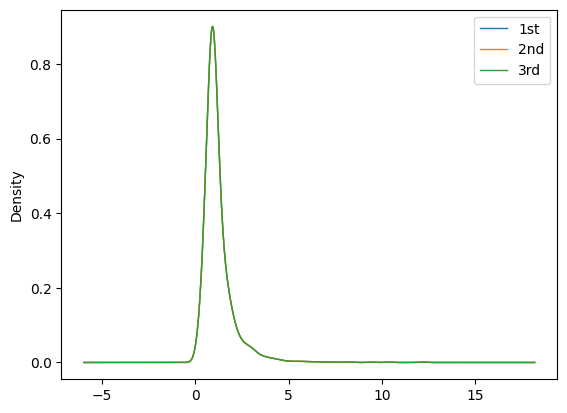

In [11]:
df_qn.plot.density(linewidth=1)

Text(0.5, 1.0, 'Boxplot of rawdata before Quantile Normalization')

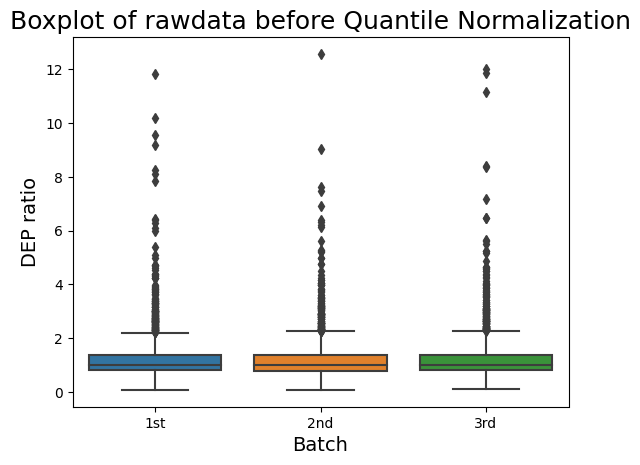

In [13]:
sns.boxplot(data=new_df)

# set x-axis label
plt.xlabel("Batch", size=14)

# set y-axis label
plt.ylabel("DEP ratio", size=14)

# set title
plt.title("Boxplot of rawdata before Quantile Normalization", size=18)

Text(0.5, 1.0, 'Boxplot of rawdata after Quantile Normalization')

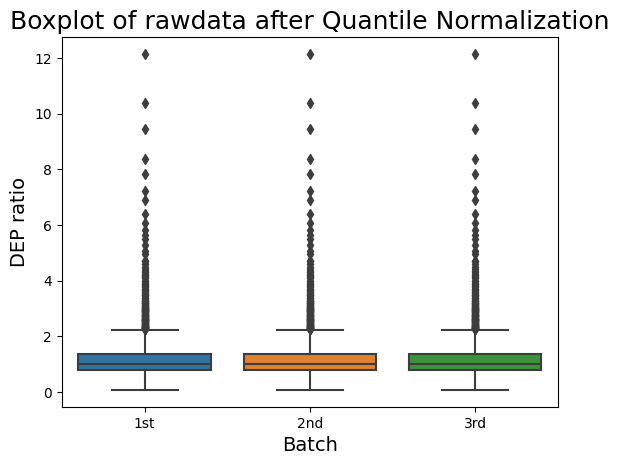

In [14]:
sns.boxplot(data=df_qn)

# set x-axis label
plt.xlabel("Batch", size=14)

# set y-axis label
plt.ylabel("DEP ratio", size=14)

# set title
plt.title("Boxplot of rawdata after Quantile Normalization", size=18)

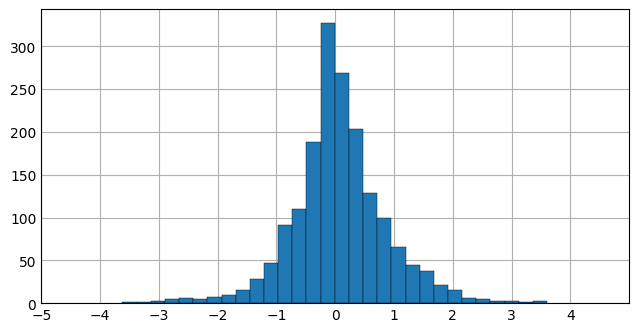

In [35]:
# Histogram after-quantile norm
import numpy as np
import matplotlib.pyplot as plt
import math

plt.style.use('_mpl-gallery')
px = 1/plt.rcParams['figure.dpi'] # pixel in inches

# data
x = df_qn['1st']
x[:] = [math.log2(x) for x in x]

# plot
fig, ax = plt.subplots(figsize=(600*px, 300*px)) # subplots(n, n, figsize)

ax.hist(x, bins=30, linewidth=0.3, edgecolor="black")
ax.set(xlim=(-5,5), xticks=np.arange(-5,5,step=1))
plt.show()

In [36]:
from scipy.stats import shapiro
s = shapiro(x)
s

ShapiroResult(statistic=0.9681059122085571, pvalue=3.364925236932026e-19)

In [23]:
# import library
import math
from scipy.stats import shapiro
import pandas as pd

g1 = new_df['1st'].tolist()
g1[:] = [math.log2(x) for x in g1]

s = shapiro(g1)
s

#ShapiroResult(statistic=0.9992809295654297, pvalue=0.9748974442481995)
# p-value < 0.05 -> H0 reject = not normal
# p-value > 0.05 -> H1 reject = Normal

ShapiroResult(statistic=0.9642592668533325, pvalue=2.4213171113928272e-20)

In [39]:
# standardization
from scipy.stats import zscore
df_qnz = df_qn.apply(zscore)

z1 = df_qnz['1st'].tolist()
shapiro(z1)

ShapiroResult(statistic=0.6702132225036621, pvalue=0.0)